In [ ]:
# Sample file for possibilities working with random variables
#
# copyright: Barbara Staehle, HTWG Konstanz
# bstaehle@htwg-konstanz.de
#
# v 1.0 11/2025

# Vergleich von W12 und W8+W4 (also Summe eines W8 und eines W4)


# Erster Ansatz: Händisch (via Formeln, siehe Formelsammlung)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Daten definieren
w12 = np.arange(1, 13)
w4 = np.arange(1, 5)
w8 = np.arange(1, 9)
p_plus = np.array([0, 1, 2, 3, 4, 4, 4, 4, 4, 3, 2, 1]) / (4 * 8)
p_norm = np.ones(12) / 12


### Graphisch darstellen

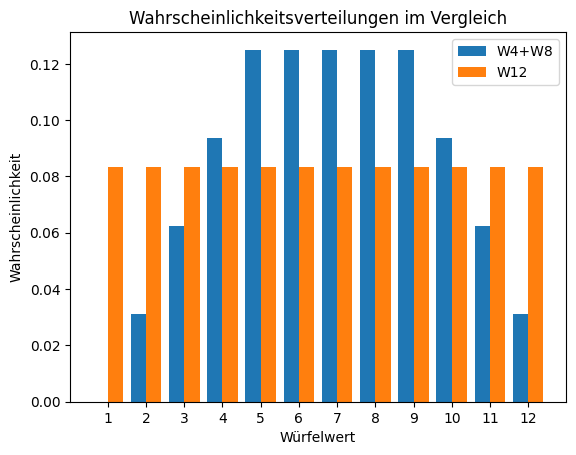

In [5]:
# Plot erstellen
plt.figure(1)
plt.clf()
plt.bar(w12 - 0.2, p_plus, width=0.4, label='W4+W8')
plt.bar(w12 + 0.2, p_norm, width=0.4, label='W12')
plt.title('Wahrscheinlichkeitsverteilungen im Vergleich')
plt.xlabel('Würfelwert')
plt.ylabel('Wahrscheinlichkeit')
plt.xticks(np.arange(1, 13))
plt.legend()
plt.show()



### Erwartungswerte berechnen

In [11]:

E_norm = np.sum(w12 * p_norm)
E_plus = np.sum(w12 * p_plus)
E_4 = np.sum(w4) / 4
E_8 = np.sum(w8) / 8
E_4plusE_8 = E_4 + E_8

# Ergebnisse ausgeben
print("Erwartungswerte:")
print(f"Erwartungswert W12: {E_norm}")
print(f"Erwartungswert W8+W4: {E_plus}")
print(" ")
print(f"Check: Erwartungswert W4 + Erwartungswert W8: {E_4} + {E_8} = {E_4+E_8}")

Erwartungswerte:
Erwartungswert W12: 6.5
Erwartungswert W8+W4: 7.0
 
Check: Erwartungswert W4 + Erwartungswert W8: 2.5 + 4.5 = 7.0


### Varianzen und Standardabweichungen berechnen

In [22]:
# Varianzen und Standardabweichungen berechnen
Var_norm = np.sum(w12**2 * p_norm) - E_norm**2
Var_plus = np.sum(w12**2 * p_plus) - E_plus**2
Var_4 = np.sum(w4**2) / 4 - E_4**2
Var_8 = np.sum(w8**2) / 8 - E_8**2

std_norm = np.sqrt(Var_norm)
std_plus = np.sqrt(Var_plus)
std_4 = np.sqrt(Var_4)
std_8 = np.sqrt(Var_8)

# Variationskoeffizienten berechnen
varcoef_norm = std_norm / E_norm
varcoef_plus = std_plus / E_plus

print("Varianzen und Standardabweichungen:\n")
print(f"Varianz W12: {Var_norm:.4f}")
print(f"Varianz W8+W4: {Var_plus:.4f}")
print(f"Check: Varianz W4 + Varianz W8: {Var_4:.4f} + {Var_8:.4f} = {(Var_4+Var_8):.4f}")
print(" ")
print(f"Standardabweichung W12: {std_norm:.4f}")
print(f"Standardabweichung W8+W4: {std_plus:.4f}")
print(f"Achtung: Standardabweichung W4 + Standardabweichung W8: {std_4:.4f} + {std_8:.4f} = {(std_4+std_8):.4f}")

print("\nVariationskoeffizienten zeigen, dass W12 stärker variiert (zufälliger ist) als W4+W8:")
print(f"Variationskoeffizient W12: {varcoef_norm:.4f}")
print(f"Variationskoeffizient W8+W4: {varcoef_plus:.4f}")


Varianzen und Standardabweichungen:

Varianz W12: 11.9167
Varianz W8+W4: 6.5000
Check: Varianz W4 + Varianz W8: 1.2500 + 5.2500 = 6.5000
 
Standardabweichung W12: 3.4521
Standardabweichung W8+W4: 2.5495
Achtung: Standardabweichung W4 + Standardabweichung W8: 1.1180 + 2.2913 = 3.4093

Variationskoeffizienten zeigen, dass W12 stärker variiert (zufälliger ist) als W4+W8:
Variationskoeffizient W12: 0.5311
Variationskoeffizient W8+W4: 0.3642



# Zweiter Ansatz: verwende stats.rv_discrete

In [2]:
x = np.arange(1,13)
x4 = np.arange(1,5)
x8 = np.arange(1,9)

p_plus = np.array([0, 1, 2, 3, 4, 4, 4, 4, 4, 3, 2, 1]) / (4 * 8)
p_norm = np.ones(12) / 12
p_4 = np.ones(4) / 4
p_8 = np.ones(8) / 8

w12 = stats.rv_discrete(name='custm', values=(x, p_norm))
w4p8 = stats.rv_discrete(name='custm', values=(x, p_plus))
w4 = stats.rv_discrete(name='custm', values=(x4, p_4))
w8 = stats.rv_discrete(name='custm', values=(x8, p_8))

### Graphisch darstellen

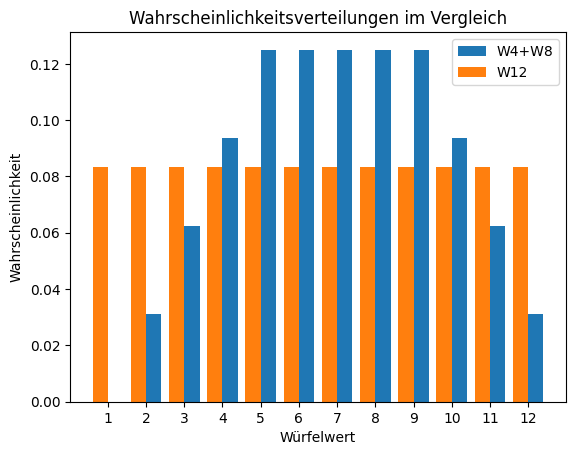

In [3]:
fig, ax = plt.subplots(1, 1)
plt.bar(x + 0.2, w4p8.pmf(x), width=0.4, label='W4+W8')
plt.bar(x - 0.2, w12.pmf(x), width=0.4, label='W12')
plt.title('Wahrscheinlichkeitsverteilungen im Vergleich')
plt.xlabel('Würfelwert')
plt.ylabel('Wahrscheinlichkeit')
plt.xticks(x)
plt.legend()
plt.show()

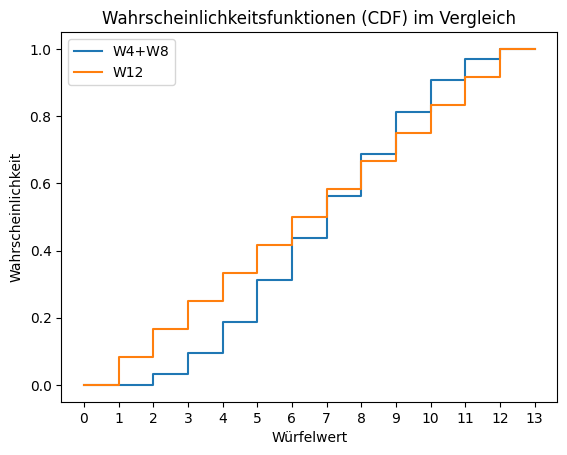

In [4]:
fig, ax = plt.subplots(1, 1)

x2 = np.append(x, [0,13])
y12 = np.append(w12.cdf(x), [0,1])
y4p8 = np.append(w4p8.cdf(x), [0,1])
plt.step(sorted(x2),sorted(y4p8),where='post', label='W4+W8')
plt.step(sorted(x2),sorted(y12),where='post', label='W12')

plt.title('Wahrscheinlichkeitsfunktionen (CDF) im Vergleich')
plt.xlabel('Würfelwert')
plt.ylabel('Wahrscheinlichkeit')
plt.xticks(x2)
plt.legend()
plt.show()


### Erwartungswerte berechnen

In [5]:
print("Erwartungswerte:")
print(f"Erwartungswert W12: {w12.mean()}")
print(f"Erwartungswert W8+W4: {w4p8.mean()}")
print(" ")
print(f"Check: Erwartungswert W4 + Erwartungswert W8: {w4.mean()} + {w8.mean()} = {w4.mean()+w8.mean()}")

Erwartungswerte:
Erwartungswert W12: 6.5
Erwartungswert W8+W4: 7.0
 
Check: Erwartungswert W4 + Erwartungswert W8: 2.5 + 4.5 = 7.0


### Varianzen und Standardabweichungen berechnen

In [6]:
print("Varianzen und Standardabweichungen:\n")
print(f"Varianz W12: {w12.var():.4f}")
print(f"Varianz W8+W4: {w4p8.var():.4f}")
print(f"Check: Varianz W4 + Varianz W8: {w4.var():.4f} + {w8.var():.4f} = {(w8.var()+w4.var()):.4f}")
print(" ")
print(f"Standardabweichung W12: {w12.std():.4f}")
print(f"Standardabweichung W8+W4: {w4p8.std():.4f}")
print(f"Achtung: Standardabweichung W4 + Standardabweichung W8: {w4.std():.4f} + {w8.std():.4f} = {(w4.std()+w8.std()):.4f}")

print("\nVariationskoeffizienten zeigen, dass W12 stärker variiert (zufälliger ist) als W4+W8:")
print(f"Variationskoeffizient W12: {w12.std()/w12.mean():.4f}")
print(f"Variationskoeffizient W8+W4: {w4p8.std()/w4p8.mean():.4f}")


Varianzen und Standardabweichungen:

Varianz W12: 11.9167
Varianz W8+W4: 6.5000
Check: Varianz W4 + Varianz W8: 1.2500 + 5.2500 = 6.5000
 
Standardabweichung W12: 3.4521
Standardabweichung W8+W4: 2.5495
Achtung: Standardabweichung W4 + Standardabweichung W8: 1.1180 + 2.2913 = 3.4093

Variationskoeffizienten zeigen, dass W12 stärker variiert (zufälliger ist) als W4+W8:
Variationskoeffizient W12: 0.5311
Variationskoeffizient W8+W4: 0.3642
